In [1]:

%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import numpy as np
import cv2


import FeaturesExtractor.main as fe
from FeatureMatching.distance import getNbAndP,getFilteredMatch
from ImageProcessing.processing import cropToCoin


plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 120



In [2]:
param = {
    "longeur caractéristique du RBF":7,
    "nombre de points d'interêts":100,
}

path1 = "data/5862 Droit.jpg"
path2 = "data/13001 Droit.jpg"

In [3]:
[img1,features1] = fe.getFeatures(param,path1)
[img2,features2] = fe.getFeatures(param,path2)



In [4]:
kp1,kp2,match = getFilteredMatch(img1,features1,img2,features2)


In [5]:
[nb,p] = getNbAndP(kp1,kp2,match)

In [6]:
d = nb-p

In [7]:
d

5.138040288292356

In [8]:
from numApp import getDistance, getDistanceMatrix

In [9]:
print(getDistance(param,path1,path2))

-5.138040288292356


In [10]:
import os

listeChemin = []

basepath = 'data/'
for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        listeChemin.append(basepath + entry)
        
pathList = listeChemin[:]
print(len(pathList))

14


In [11]:
pathList

['data/5862 Droit.jpg',
 'data/13001 Droit.jpg',
 'data/13088 Droit.jpg',
 'data/14259 Droit.jpg',
 'data/15242 Droit.jpg',
 'data/17217 Droit.jpg',
 'data/19143 Droit.jpg',
 'data/34268 Droit.jpg',
 'data/38325 Droit.jpg',
 'data/39630 Droit.jpg',
 'data/39631 Droit.jpg',
 'data/33555 Droit.jpg',
 'data/35362 Droit.jpg',
 'data/36419 Droit.jpg']

In [12]:
D = getDistanceMatrix(param,pathList)

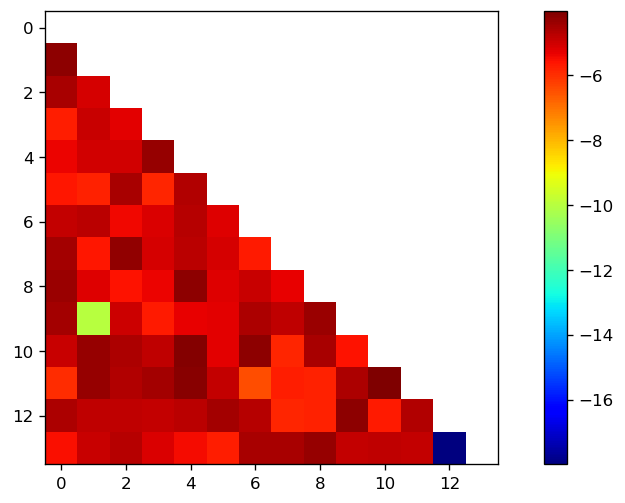

In [13]:
plt.imshow(D,cmap="jet")
plt.colorbar()
plt.show()

In [14]:
ListeCoin= np.array([
    [9,1],
    [13,12]
])


In [15]:
for ensemble in ListeCoin:
    out = pathList[ensemble[0]] + "  Avec  " + pathList[ensemble[1]]
    print(out)

data/39630 Droit.jpg  Avec  data/13001 Droit.jpg
data/36419 Droit.jpg  Avec  data/35362 Droit.jpg


In [16]:
for ensemble in ListeCoin:
    print(D[tuple(ensemble)])

-9.997972757613235
-17.99905639436986


In [18]:
n,b = np.shape(D)

In [19]:
n

14

In [20]:
sumTot = np.nansum(D)
nbTot = int(n*(n-1)/2)

In [23]:
nbCoin,b = np.shape(ListeCoin)

In [24]:
nbCoin

2

In [25]:
sumDistCoin = 0
for ensemble in ListeCoin:
    sumDistCoin = sumDistCoin + D[tuple(ensemble)]
    

In [26]:
print(sumDistCoin)

-27.997029151983092


In [27]:
moyenneDistCoin = sumDistCoin/nbCoin
moyenneDistAutre = (sumTot-sumDistCoin)/(nbTot-nbCoin)

In [28]:
print(moyenneDistCoin)
print(moyenneDistAutre)

-13.998514575991546
-4.972543886859544
